In [ ]:
! pip install langchainhub langsmith openai

In [3]:
import os
os.environ["LANGCHAIN_API_KEY"] = "xxx"

## Online Evaluation

Sometimes we want to evaluate generations as they are logged to a project.

We can use online evaluators to do this!

For example, we can consider a use-case like RAG:

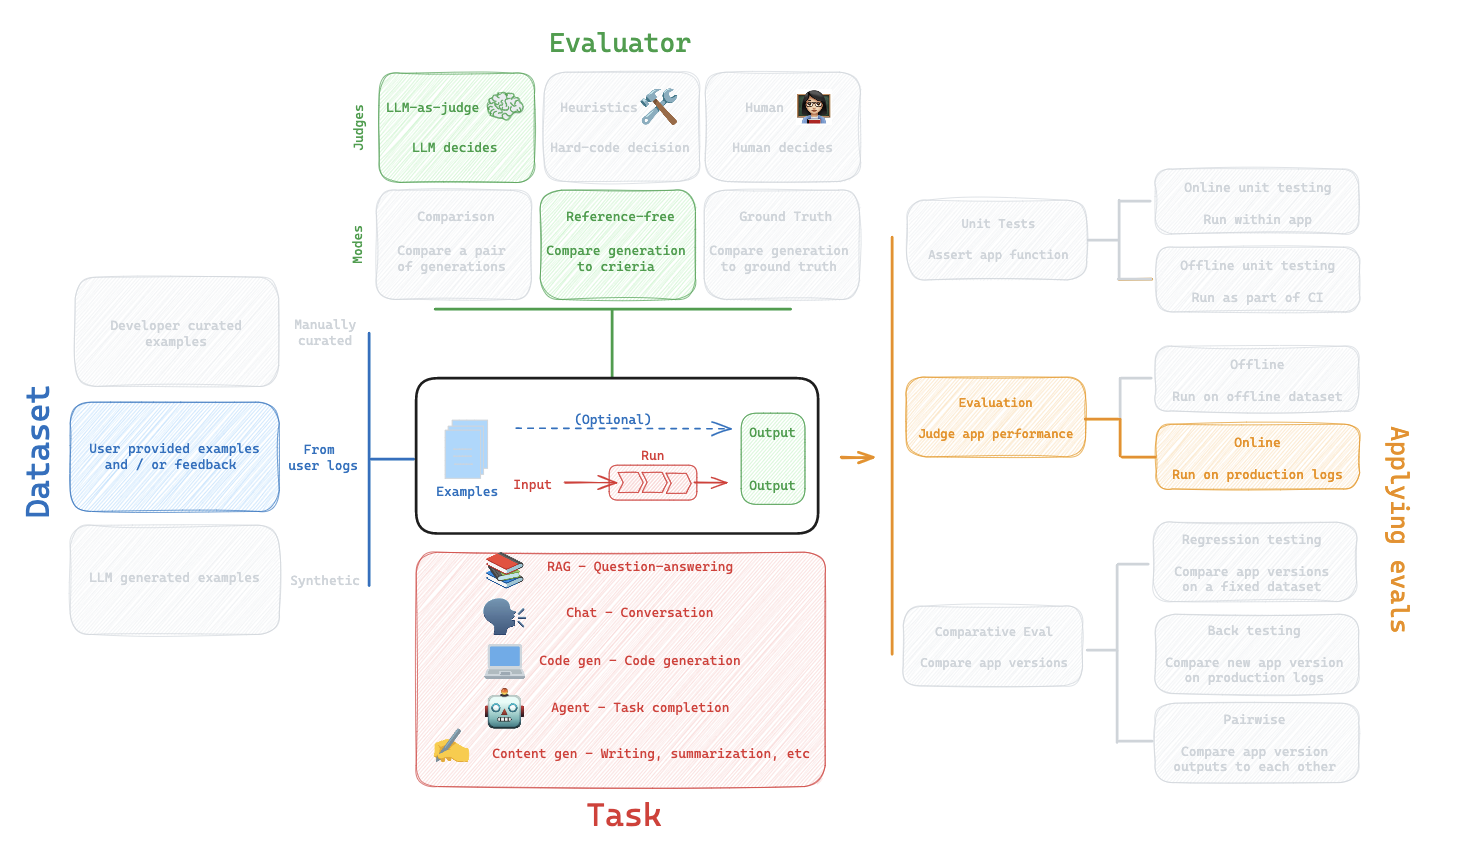


In [21]:
# Project
os.environ["LANGCHAIN_PROJECT"] = "RAG_online_eval_test"

In [29]:
import openai
from langsmith import traceable, Client
import uuid

client = openai.Client()

@traceable(
    run_type="chain",
    name="rag",
)
def rag(question: str, docs: list):
    return (
        client.chat.completions.create(
            model="gpt-3.5-turbo",
            temperature=0,
            messages=[
                {
                    "role": "system",
                    "content": f"Answer questions based on these documents: {docs}",
                },
                {"role": "user", "content": question},
            ],
        )
        .choices[0]
        .message.content
    )


# Pass in question and source documents
rag("where did harrison work", ["ankush and his friend worked at kensho"])

'Harrison worked at Kensho, as mentioned in the document "Ankush and his friend worked at Kensho."'

In [30]:
rag("where did ankush work", ["ankush and his friend worked at kensho"])

'Ankush worked at Kensho.'

In [31]:
rag("where did lance work", ["ankush and his friend worked at kensho"])

'Lance worked at Kensho, along with Ankush and his friend.'